# Coding Temple's Data Analytics Program:
---
## Python for DA: Machine Learning Assignment

For your assignment today, you will look through the [UCI Irvine ML Repository](https://archive.ics.uci.edu/datasets) to find a dataset that you can build a model on. Your workflow should look something like:

- Import any necessary libraries
- Load in the data
- Clean/Tidy the Data
- Explore the data:
    - Gather all summary statistics
    - Visualize your data and your target
    - Identify any relationships between your target and the feature matrix
    - Loop back through and continue cleaning data/feature engineering as needed
- Split the data
- Establish a baseline model
- Create model
- Establish model accuracy
- Hypertune your model
- Communicate your results

The model, data, and methods you use are all completely up to you for this assignment! Ensure you label your notebook with markdown cells and proper comments

In [1]:
# Importing 

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, roc_auc_score
from sklearn.pipeline import make_pipeline
from xgboost import XGBClassifier, XGBRegressor


In [2]:
# Reading in the data

df = pd.read_csv(r'C:\Users\adoro\OneDrive\Desktop\CT Python\Week Four\Assignments\auto.csv')
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,origin
0,18.0,8.0,307.0,130.0,3504.0,12.0,1
1,15.0,8.0,350.0,165.0,3693.0,11.5,1
2,18.0,8.0,318.0,150.0,3436.0,11.0,1
3,16.0,8.0,304.0,150.0,3433.0,12.0,1
4,17.0,8.0,302.0,140.0,3449.0,10.5,1
...,...,...,...,...,...,...,...
393,27.0,NaN,140.0,86.00,2790.0,15.6,1
394,44.0,NaN,97.0,52.00,2130.0,24.6,2
395,32.0,NaN,135.0,84.00,2295.0,11.6,1
396,28.0,NaN,120.0,79.00,2625.0,18.6,1


In [3]:
# To see what type of specifics we have
df.describe()

,mpg,cylinders,displacement,weight,acceleration,origin
count,398.000000,194.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,6.984536,193.425879,2970.424623,15.568090,1.572864
std,7.815984,1.167242,104.269838,846.841774,2.757689,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,1.000000
25%,17.500000,6.000000,104.250000,2223.750000,13.825000,1.000000
50%,23.000000,8.000000,148.500000,2803.500000,15.500000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,3.000000


In [4]:
# Next check the column headings to make sure that they are snakecase - They are all snakecase
# Check to find any null values and where they are

df.isnull().sum()

mpg               0
cylinders       204
displacement      0
horsepower        0
weight            0
acceleration      0
origin            0
dtype: int64

In [5]:
# Cleaning data by removing the cylinders column as over 50% are Null and zero them out would skew the data. 
# Also the mean would give me a cylinder that does not exist.

df.drop(columns = 'cylinders', inplace = True) 



In [6]:
df

,mpg,displacement,horsepower,weight,acceleration,origin
0,18.0,307.0,130.0,3504.0,12.0,1
1,15.0,350.0,165.0,3693.0,11.5,1
2,18.0,318.0,150.0,3436.0,11.0,1
3,16.0,304.0,150.0,3433.0,12.0,1
4,17.0,302.0,140.0,3449.0,10.5,1
...,...,...,...,...,...,...
393,27.0,140.0,86.00,2790.0,15.6,1
394,44.0,97.0,52.00,2130.0,24.6,2
395,32.0,135.0,84.00,2295.0,11.6,1
396,28.0,120.0,79.00,2625.0,18.6,1


In [7]:
df.isnull().sum()

mpg             0
displacement    0
horsepower      0
weight          0
acceleration    0
origin          0
dtype: int64

In [8]:
df['horsepower'].value_counts()

150.0    22
90.00    20
88.00    19
110.0    18
100.0    17
         ..
61.00     1
93.00     1
148.0     1
152.0     1
82.00     1
Name: horsepower, Length: 94, dtype: int64

In [9]:
# Now that there are no more null values, I am going to check to make sure all columns are numerical.

df.dtypes

# As horsepower is an object, I need to change it to an integer/float.

df.horsepower = pd.to_numeric(df.horsepower, errors = "coerce")

df.dtypes


mpg             float64
displacement    float64
horsepower      float64
weight          float64
acceleration    float64
origin            int64
dtype: object

In [10]:
# Now my data is cleaned and ready to analyze

df

,mpg,displacement,horsepower,weight,acceleration,origin
0,18.0,307.0,130.0,3504.0,12.0,1
1,15.0,350.0,165.0,3693.0,11.5,1
2,18.0,318.0,150.0,3436.0,11.0,1
3,16.0,304.0,150.0,3433.0,12.0,1
4,17.0,302.0,140.0,3449.0,10.5,1
...,...,...,...,...,...,...
393,27.0,140.0,86.0,2790.0,15.6,1
394,44.0,97.0,52.0,2130.0,24.6,2
395,32.0,135.0,84.0,2295.0,11.6,1
396,28.0,120.0,79.0,2625.0,18.6,1


In [11]:
# Summary Stats - After Cleaning the Data

df.describe().round(2)

,mpg,displacement,horsepower,weight,acceleration,origin
count,398.00,398.00,392.00,398.00,398.00,398.00
mean,23.51,193.43,104.47,2970.42,15.57,1.57
std,7.82,104.27,38.49,846.84,2.76,0.80
min,9.00,68.00,46.00,1613.00,8.00,1.00
25%,17.50,104.25,75.00,2223.75,13.82,1.00
50%,23.00,148.50,93.50,2803.50,15.50,1.00
75%,29.00,262.00,126.00,3608.00,17.18,2.00
max,46.60,455.00,230.00,5140.00,24.80,3.00


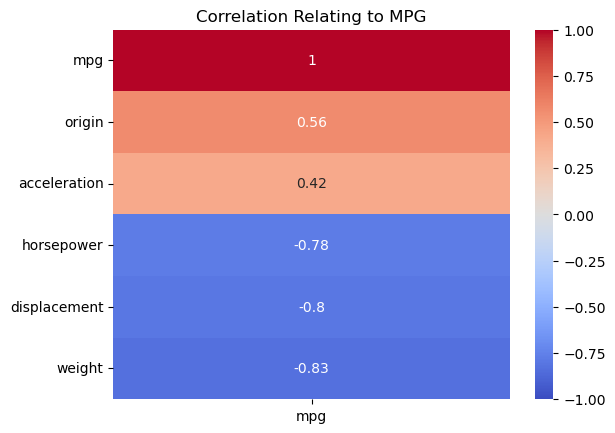

In [12]:
# What I want to analyze - Horsepower vs MPG
# Does horsepower affect mpg?

df.corr()

sns.heatmap(df.corr()[['mpg']].sort_values(by = 'mpg', ascending = False),
            annot = True, 
            vmax = 1,
            vmin = -1,
            cmap = 'coolwarm')

plt.title('Correlation Relating to MPG');

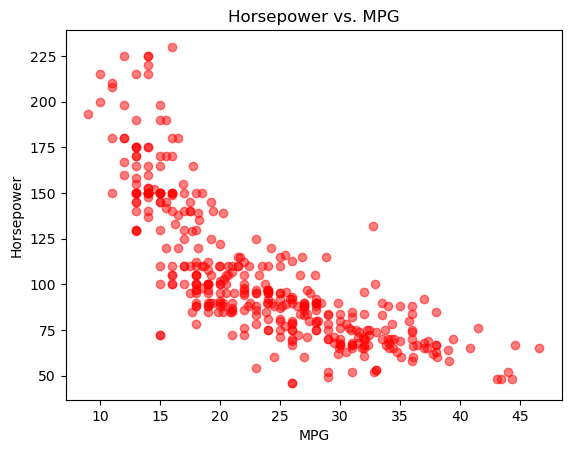

In [13]:
# Creating a Scatterplot

plt.scatter(df['mpg'],
            df['horsepower'],
            color = 'red',
            alpha = 0.5)

plt.title('Horsepower vs. MPG')
plt.xlabel('MPG')
plt.ylabel('Horsepower');

In [14]:
# When I ran the Linear Regression model below, I found that there were 6 NAN values within the horsepower data column.
# Therefore, I removed the NAN values from the Dataframe as they only accounted for a small minority of the data (6/392 or 1.5%)

df.isna().sum()

mpg             0
displacement    0
horsepower      6
weight          0
acceleration    0
origin          0
dtype: int64

In [15]:
# Continued Cleaning of the data to remove the NAN

df.dropna(inplace = True)

df.isna().sum()

mpg             0
displacement    0
horsepower      0
weight          0
acceleration    0
origin          0
dtype: int64

In [16]:
# Splitting the data
target = 'mpg'

X = df.drop(columns=[target])
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=.8, random_state=42)

assert len(X_train) + len(X_test) == len(X), "You messed up your code"

In [17]:
# Establishing a Baseline
print(df.mpg.mean().round(2))
baseline = [df.mpg.mean()] * len(y_train)

23.45


We can predict that there are 23.51 mpg for each datapoint

In [18]:
# Building our Model

# We do not need to include an Encoder/Imputer as this data set is numerical and free of any null/NAN items

# Instatiate our Model
lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression()

In [19]:
# Model 1 - Creating a pipeline object
lr = make_pipeline(
    LinearRegression()
)

lr.fit(X_train, y_train)

Pipeline(steps=[('linearregression', LinearRegression())])

In [20]:
# Model 2 
pipe_dt = make_pipeline(
    DecisionTreeRegressor(random_state=42)
)

pipe_dt.fit(X_train, y_train)

Pipeline(steps=[('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [21]:
# MODEL 3 
pipe_rf = make_pipeline(
    RandomForestRegressor(random_state=42)
)

pipe_rf.fit(X_train, y_train)

Pipeline(steps=[('randomforestregressor',
                 RandomForestRegressor(random_state=42))])

In [22]:
# MODEL 4 

pipe_xg = make_pipeline(
    XGBRegressor(random_state=42)
)
pipe_xg.fit(X_train, y_train)

Pipeline(steps=[('xgbregressor',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, device=None,
                              early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=42, ...))])

In [23]:
# Checking the Metrics - Mean Absolute Erroe

print('Baseline Scores:')
print(mean_absolute_error(y_train, baseline).round(2))
print('-------------------')
print('Linear Model Score:')
print(mean_absolute_error(y_train, lr.predict(X_train)).round(2))
print(mean_absolute_error(y_test, lr.predict(X_test)).round(2))
print('-------------------')
print('Decision Tree Model Score:')
print(mean_absolute_error(y_train, pipe_dt.predict(X_train)).round(2))
print(mean_absolute_error(y_test, pipe_dt.predict(X_test)).round(2))
print('-------------------')
print('Random Forest Model Score:')
print(mean_absolute_error(y_train, pipe_rf.predict(X_train)).round(2))
print(mean_absolute_error(y_test, pipe_rf.predict(X_test)).round(2))
print('-------------------')
print('XGBoost Model Score:')
print(mean_absolute_error(y_train, pipe_xg.predict(X_train)).round(2))
print(mean_absolute_error(y_test, pipe_xg.predict(X_test)).round(2))

Baseline Scores:
6.72
-------------------
Linear Model Score:
3.15
3.43
-------------------
Decision Tree Model Score:
0.01
3.75
-------------------
Random Forest Model Score:
1.0
2.91
-------------------
XGBoost Model Score:
0.06
3.12


I am still trying to understand what the outcomes above mean, but based on our example in class, I would chose the Linear Model Score as the best
model in terms of the assoication of mpg to other columns as the train/test had the smallest differiental in their model score.

In [24]:
# R2 scores

print('Baseline Scores:')
print(r2_score(y_train, baseline).round(2))
print('-------------------')
print('Linear Model Score:')
print(r2_score(y_train, lr.predict(X_train)).round(2))
print(r2_score(y_test, lr.predict(X_test)).round(2))
print('-------------------')
print('Decision Tree Model Score:')
print(r2_score(y_train, pipe_dt.predict(X_train)).round(2))
print(r2_score(y_test, pipe_dt.predict(X_test)).round(2))
print('-------------------')
print('Random Forest Model Score:')
print(r2_score(y_train, pipe_rf.predict(X_train)).round(2))
print(r2_score(y_test, pipe_rf.predict(X_test)).round(2))
print('-------------------')
print('XGBoost Model Score:')
print(r2_score(y_train, pipe_xg.predict(X_train)).round(2))
print(r2_score(y_test, pipe_xg.predict(X_test)).round(2))

Baseline Scores:
-0.0
-------------------
Linear Model Score:
0.73
0.65
-------------------
Decision Tree Model Score:
1.0
0.39
-------------------
Random Forest Model Score:
0.97
0.69
-------------------
XGBoost Model Score:
1.0
0.59


From the results above, I would still agree that the Linear Model provides us with the best prediction for mpg in regards to the other columns presented.